#### CSE-221710310060-SAHITHI.P

[session link]("https://docs.google.com/document/d/1Qcz6Qm6XMvND9z1enjPBKrAdiXaXscTFEkByLHLMbN0/edit")

[dataset link]("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/titanic.csv")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Creating a new cloumn family in the dataset by addig SibSp column and Prach column
df['Family']=df['SibSp']+df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [4]:
#Ticket---> As it is just a random number, we can skip this cloumn froj our analysis
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [5]:
#based on the categories , we will analyze which category people were more likely to survive
## Low,mid,high,mid-high
df['Fare_Category']=pd.cut(df.Fare,bins=[0,7.9,14.45,31.00,512],
                          labels=['Low','Mid','Mid-High','High'])
df['Fare_Category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [6]:
#Comparing the fare with fare category
df[['Fare','Fare_Category']]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid-High
888,23.4500,Mid-High
889,30.0000,Mid-High


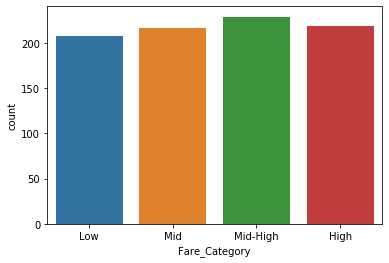

In [7]:
## Visualize the fare category
## countplot give entire count of a category-->categories of survived and deceased
sns.countplot(x='Fare_Category',data=df)

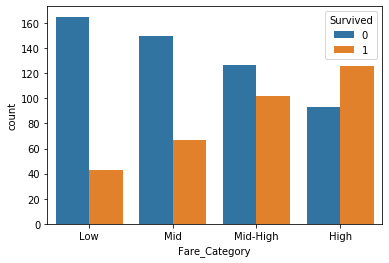

In [8]:
#visualizing the count of categories based on survived 
sns.countplot(x='Fare_Category',hue='Survived',data=df)

Text(0.5, 1.0, 'Survival based on Fare Category')

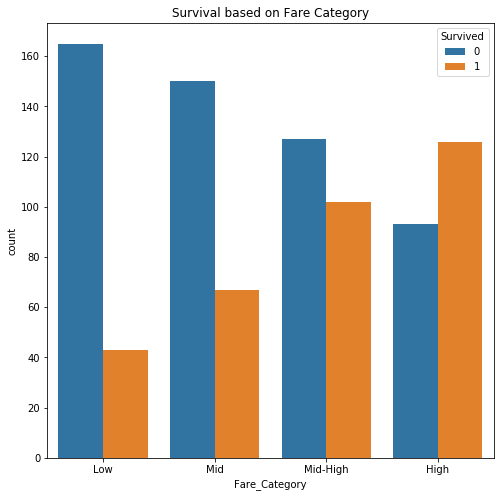

In [9]:
#visualizing the count of categories based on survived 
plt.figure(figsize=(8,8))
sns.countplot(x='Fare_Category',hue='Survived',data=df).\
            set_title('Survival based on Fare Category')

Text(0.5, 1.0, 'Survival based on Fare Category')

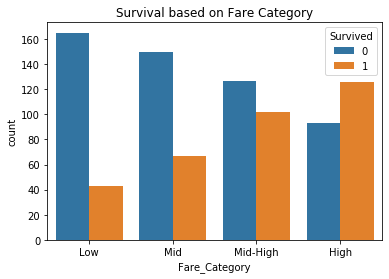

In [10]:
#visualizing the count of categories based on survived 
#plt.figure(figsize=(8,8))
sns.countplot(x='Fare_Category',hue='Survived',data=df).\
            set_title('Survival based on Fare Category')

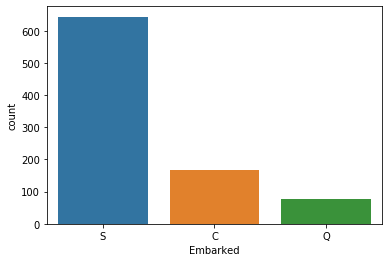

In [11]:
## visualizing the port column
sns.countplot(x='Embarked',data=df)

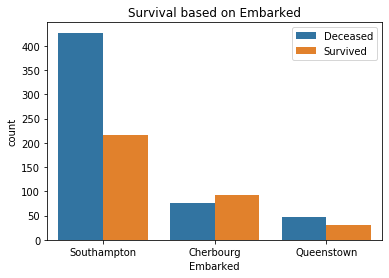

In [12]:
## visualizing the port column
p=sns.countplot(x='Embarked',hue='Survived',data=df)
p.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
p.set_title('Survival based on Embarked')
p.legend(labels=['Deceased','Survived'])

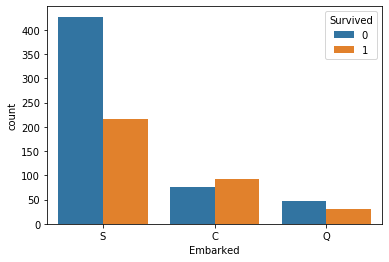

In [13]:
## visualizing the port column
sns.countplot(x='Embarked',hue='Survived',data=df)

### Imputing the Cabin column:

In [14]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [15]:
## Cabin---> 77% missing values,we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [16]:
df.Cabin.isnull().sum()

0


### Imputing the Age Column:


In [17]:
## median---> sorting in the order (middle value) NaN in the age column should be substittued with median of age
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

### Imputing the Embarked Column:

In [18]:
## imputing the embarked column---> Mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [19]:
#imputing the fare category column
df.Fare_Category.isnull().sum()

18

In [20]:
df.Fare_Category.fillna(df.Fare_Category.mode()[0],inplace=True)
df.Fare_Category.isnull().sum()

0

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

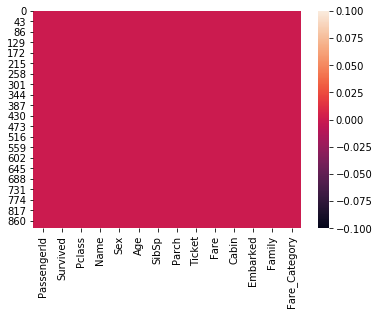

In [22]:
sns.heatmap(df.isnull())

In [23]:
df['Age-Range']=pd.cut(df.Age,[0,10,20,30,40,60,80])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [25]:
#n colunmns , we need to incluse upto n-1 dummy columns
## when we are creating any dummy column we need to drop a column
dummy_set = pd.get_dummies(df.Fare_Category,drop_first=True)

In [26]:
df=pd.concat([df,dummy_set],axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range,Mid,Mid-High,High
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]",0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]",0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]",1,0,0


In [27]:
## encoding of categorical variables or columns
df = pd.concat([df, pd.get_dummies(df.Cabin,prefix='Cabin',drop_first=True),
                pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
                   pd.get_dummies(df.Fare_Category,prefix='Fare',drop_first=True),
                   pd.get_dummies(df['Age-Range'],drop_first=True)],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [28]:
##encoding the sex column
from sklearn.preprocessing import LabelEncoder
df['Sex']= LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [29]:
# drop unnecessary columns
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare',
        'Embarked','Fare_Category','Cabin','Age-Range'],
       axis=1,inplace=True)
df.shape

(891, 164)

In [30]:
df.head()

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [31]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Family      int64
Mid         uint8
            ...  
(10, 20]    uint8
(20, 30]    uint8
(30, 40]    uint8
(40, 60]    uint8
(60, 80]    uint8
Length: 164, dtype: object

In [36]:
## seperating the input and output data, dropping the survived column fron the data
X = df.drop('Survived',axis=1)
X.shape

(891, 163)

In [33]:
## output column
y= df.iloc[:,0]
y.shape

(891,)

#### 20 june 2020

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=23) #random_state = to select the constant rows

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 163)
(223, 163)
(668,)
(223,)


In [39]:
X_train #input train

,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
91,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
114,3,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
657,3,0,2,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
778,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
146,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
488,3,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
40,3,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
742,1,0,4,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [40]:

y_train #output of x_train


91     0
114    0
657    0
778    0
146    1
      ..
31     1
488    0
40     0
742    1
595    0
Name: Survived, Length: 668, dtype: int64

In [41]:

X_test

,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
727,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
668,3,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
210,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
654,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
228,2,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
341,1,0,5,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
421,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
434,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [42]:

y_test

727    1
668    0
210    0
654    0
228    0
      ..
152    0
341    1
421    0
434    0
889    1
Name: Survived, Length: 223, dtype: int64

In [43]:
## To check the default number of rows displayed
pd.get_option('display.max_rows')

60

In [44]:
## To display all the columns in the data frame, 
## we have to use set_option dislay.max_columns to be set to 
## None(None means unlimited) 
pd.set_option('display.max_columns',None) # In place of None if given as 50, it will display on the 50 columns

In [45]:
#reset to previous mode 
pd.reset_option('display.max_columns')

In [46]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


For Classification we are classifying whether the passenger is survived or not Logistic Regression:

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for logistic regression


##### Dataset is of 100% - 891 rows

 - 891 rows --- 2 parts
    - training data(subset of original data)(800 rows,we have in training data)
        - we will build the model on training data
    - testing data(subset of our riginal data)(91 rows,we will test the model performance on 91 rows)

In [48]:
## we have to apply this object(log_reg) to the training data
log_reg.fit(X_train,y_train)#with help of fit method we are fitting the 
                           ## Logistic Regression on training data
## objectName.fit(InputData,outputData)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###### Instead of directly predicting on test data , let us see how well the model predicts the training data

In [49]:

## predicting on the training data
## Syntax: ObjectName.predict(Input)
log_reg.predict(X_train)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [50]:
## Predicting on the training data
## Syntax: objectName.predict(TrainInput)
y_train_pred=log_reg.predict(X_train)

In [51]:
y_train ==y_train_pred #comparing original data output and model predicted output

91      True
114    False
657    False
778     True
146    False
       ...  
31      True
488     True
40     False
742     True
595     True
Name: Survived, Length: 668, dtype: bool

In [52]:
## accuracy_score ---> with help of this metric,we can evaluate the overall
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8473053892215568

In [53]:
## predict the model on test :
y_test_pred = log_reg.predict(X_test)

In [54]:
y_test_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [55]:
y_test == y_test_pred

727     True
668     True
210     True
654    False
228     True
       ...  
152     True
341     True
421     True
434     True
889     True
Name: Survived, Length: 223, dtype: bool

In [56]:
## accuracy of the test data(Original test data output and the model predicted output)
accuracy_score(y_test,y_test_pred)

0.7757847533632287